# Simulations of the IDA model to check the predicted $(\Lambda_i, \delta_{id})$ correlation

Go to [Index](response_Witz2019_index.ipynb).

In this notebook, we perform simulations of the IDA model so that we can assert the theoretical prediction for the $(\Lambda_i, \delta_{id})$ correlation:
$$
\rho(\Lambda_i, \delta_{id}) = - \frac{1}{\sqrt{1 + \frac{\sigma_{dd}^2}{\sigma_{ii}^2}}}.
$$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
import os, re, copy
import numpy as np
import pandas as pd
import scipy.stats as sst
import matplotlib.pyplot as plt
import matplotlib.colors as mco
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.gridspec as mgs
plt.rcParams['svg.fonttype'] = 'none'   # to export text as text, not curves
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('code')
# from functions_response import plot_2varcorr_expsim, plot_2varcorr_overlay, process_df_SIM
from simulations import run_IDA, plot_2varcorr_overlay

In [40]:
def func_slope(dataframe):
    delta_ii, delta_dd = dataframe.loc[:, ['dLAi','dSd']].to_numpy().astype('float64').T
    mu_ii = np.nanmean(delta_ii)
    mu_dd = np.nanmean(delta_dd)
    s_ii = np.nanstd(delta_ii)
    s_dd = np.nanstd(delta_dd)
    print("mu_ii = {:.4f}    s_ii = {:.4f}    CV = {:.0f} %".format(mu_ii, s_ii, s_ii/mu_ii*100))
    print("mu_dd = {:.4f}    s_dd = {:.4f}    CV = {:.0f} %".format(mu_dd, s_dd, s_dd/mu_dd*100))

    A = -1./(mu_dd/mu_ii - 1.)
    
    return A

In [3]:
# # create/declare export directory for figures
# fig_dir = os.path.join('figures','LAi_delta_id_correlation')
# if not os.path.isdir(fig_dir):
#     os.makedirs(fig_dir)
    
# # experimental files
# direxp = os.path.join('.','experiments')

# # simulation files produced for this response.
# dirsimu = 'simulations'
# if not os.path.isdir(dirsimu):
#     raise ValueError("Directory doesn't exist:", dirsimu)
    
# # select extensions for the figure output
# ext_list = ['.png','.svg']

# # fields to plot
# field_x = 'Lambda_i'
# field_y = 'delta_id'

In [56]:
params = { \
          'LAi': {\
                  'mu': 1., \
                  'cv': 0.10 \
                 }, \
          'Sd': {\
                 'mu': 2.7, \
                 'cv': 0.12 \
                }
}
mu_ds = np.linspace(1.5, 4, 11)

In [58]:
params_bkp = copy.deepcopy(params)
dfs = []
for mu_d in mu_ds:
    params = copy.deepcopy(params_bkp)
    params['Sd']['mu'] = mu_d
    df = run_IDA(100000, params)
    df['delta_id'] = df['Sd'] - df['LAi']
    
#     stats = df.describe()
#     stats.loc['cv'] = stats.loc['std'] / stats.loc['mean']
#     stats

    dfs.append(df)

binw = 0.0500
mu_ii = 0.5000    s_ii = 0.0866    CV = 17 %
mu_dd = 0.7499    s_dd = 0.1559    CV = 21 %
binw = 0.0500
mu_ii = 0.5003    s_ii = 0.0868    CV = 17 %
mu_dd = 0.8754    s_dd = 0.1815    CV = 21 %
binw = 0.0500
mu_ii = 0.5000    s_ii = 0.0865    CV = 17 %
mu_dd = 0.9999    s_dd = 0.2081    CV = 21 %
binw = 0.0500
mu_ii = 0.4999    s_ii = 0.0864    CV = 17 %
mu_dd = 1.1248    s_dd = 0.2325    CV = 21 %
binw = 0.0500
mu_ii = 0.5001    s_ii = 0.0868    CV = 17 %
mu_dd = 1.2500    s_dd = 0.2603    CV = 21 %
binw = 0.0500
mu_ii = 0.5001    s_ii = 0.0862    CV = 17 %
mu_dd = 1.3758    s_dd = 0.2866    CV = 21 %
binw = 0.0500
mu_ii = 0.5002    s_ii = 0.0865    CV = 17 %
mu_dd = 1.4996    s_dd = 0.3110    CV = 21 %
binw = 0.0500
mu_ii = 0.5001    s_ii = 0.0868    CV = 17 %
mu_dd = 1.6234    s_dd = 0.3380    CV = 21 %
binw = 0.0500
mu_ii = 0.5002    s_ii = 0.0866    CV = 17 %
mu_dd = 1.7510    s_dd = 0.3643    CV = 21 %
binw = 0.0500
mu_ii = 0.5000    s_ii = 0.0866    CV = 17 %
mu_dd

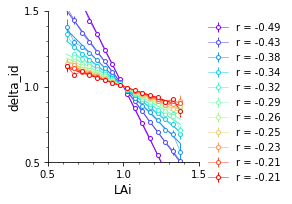

In [60]:
binw_dict = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4

fig = plot_2varcorr_overlay(dfs, field_x = 'LAi', field_y = 'delta_id', \
                            binw_dict = binw_dict, x0=x0, x1=x1, ms=ms, \
                            figsize=figsize, normalize=True, func_slope=func_slope)